### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="7c85d3daa2f17e905336e8dcaf6a8d4bf86fd6ce"
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')


In [7]:
df1=df.reset_index()['close']


In [8]:
import matplotlib.pyplot as plt


In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(653, 100)
(653,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(402, 100)
(402,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0012 - val_loss: 0.0516
Epoch 2/100
11/11 [==============================] - 1s 115ms/step - loss: 3.8918e-04 - val_loss: 0.0399
Epoch 3/100
11/11 [==============================] - 1s 112ms/step - loss: 2.6948e-04 - val_loss: 0.0295
Epoch 4/100
11/11 [==============================] - 1s 133ms/step - loss: 1.7758e-04 - val_loss: 0.0187
Epoch 5/100
11/11 [==============================] - 1s 121ms/step - loss: 1.2907e-04 - val_loss: 0.0135
Epoch 6/100
11/11 [==============================] - 1s 127ms/step - loss: 1.3652e-04 - val_loss: 0.0146
Epoch 7/100
11/11 [==============================] - 1s 115ms/step - loss: 1.2311e-04 - val_loss: 0.0149
Epoch 8/100
11/11 [==============================] - 1s 118ms/step - loss: 1.1913e-04 - val_loss: 0.0138
Epoch 9/100
11/11 [==============================] - 1s 124ms/step - loss: 1.1461e-04 - val_loss: 0.0134
Epoch 10/100
11/11 [==============================] - 2s 16

11/11 [==============================] - 1s 118ms/step - loss: 4.0331e-05 - val_loss: 0.0073
Epoch 79/100
11/11 [==============================] - 1s 120ms/step - loss: 3.8896e-05 - val_loss: 0.0057
Epoch 80/100
11/11 [==============================] - 1s 119ms/step - loss: 3.4927e-05 - val_loss: 0.0060
Epoch 81/100
11/11 [==============================] - 1s 108ms/step - loss: 3.3561e-05 - val_loss: 0.0060
Epoch 82/100
11/11 [==============================] - 1s 108ms/step - loss: 3.4254e-05 - val_loss: 0.0058
Epoch 83/100
11/11 [==============================] - 1s 109ms/step - loss: 3.2947e-05 - val_loss: 0.0059
Epoch 84/100
11/11 [==============================] - 1s 108ms/step - loss: 3.4140e-05 - val_loss: 0.0063
Epoch 85/100
11/11 [==============================] - 1s 108ms/step - loss: 3.2573e-05 - val_loss: 0.0060
Epoch 86/100
11/11 [==============================] - 1s 110ms/step - loss: 3.3137e-05 - val_loss: 0.0058
Epoch 87/100
11/11 [==============================] - 1s 11

In [21]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [22]:
tf.__version__

'2.3.0'

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
x=math.sqrt(mean_squared_error(ytest,test_predict))




In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [27]:
print("Root Mean Square Value of the Test Data using LSTM \n",math.sqrt(x))
lstmValue = math.sqrt(x)
%store lstmValue

Root Mean Square Value of the Test Data using LSTM 
 26.766544240839423
Stored 'lstmValue' (float)


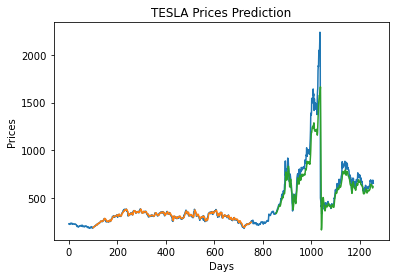

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('TESLA Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.savefig('lstm.png')
plt.show()
